In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
hypotheses.rename(columns={'Hypothesis':'hypothesis'}, inplace='True')
hypotheses.rename(columns={'Reach':'reach'}, inplace='True')
hypotheses.rename(columns={'Impact':'impact'}, inplace='True')
hypotheses.rename(columns={'Confidence':'confidence'}, inplace='True')
hypotheses.rename(columns={'Effort':'effort'}, inplace='True')

hypotheses

FileNotFoundError: [Errno 2] No such file or directory: 'hypotheses_us.csv'

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

Adaptei o endereço do arquivo para leitura no ambiente da Tripleten.
</div>

In [3]:
# Criação de DFs e separação das colunas
hypotheses= pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')
hypotheses.rename(columns={'Hypothesis':'hypothesis'}, inplace='True')
hypotheses.rename(columns={'Reach':'reach'}, inplace='True')
hypotheses.rename(columns={'Impact':'impact'}, inplace='True')
hypotheses.rename(columns={'Confidence':'confidence'}, inplace='True')
hypotheses.rename(columns={'Effort':'effort'}, inplace='True')

hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#orders = pd.read_csv('orders_us.csv')

orders = pd.read_csv('/datasets/orders_us.csv')

orders.rename(columns={'transactionId':'orderId'}, inplace='True')
orders.rename(columns={'visitorId':'userId'}, inplace='True')

orders.head(10)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [5]:
#visitors = pd.read_csv('visits_us.csv')

visitors = pd.read_csv('/datasets/visits_us.csv')
visitors.rename(columns={'visits':'visitors'}, inplace='True')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<div class="alert alert-block alert-info">
<b>Aplicação do framework ICE para priorizar hipóteses</b> <a class="tocSkip"></a>
</div>

In [6]:
hypotheses['ICE'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


<div class="alert alert-block alert-info">
<b>Aplicação do framework RICE para priorizar hipóteses</b> <a class="tocSkip"></a>
</div>

In [7]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [8]:
hypotheses[['RICE','ICE']].describe().round()

,RICE,ICE
count,9.0,9.0
mean,32.0,7.0
std,36.0,6.0
min,3.0,1.0
25%,4.0,1.0
50%,16.0,7.0
75%,40.0,11.0
max,112.0,16.0


o RICE é mais abrangente e equilibrado, enquanto o ICE é mais simplificado e pode favorecer hipóteses de alto impacto, mas com menor alcance .

<div class="alert alert-block alert-info">
<b>Análise de teste A/B
</b> <a class="tocSkip"></a>
</div>

In [9]:
orders
#visitors

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [10]:
ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [11]:
pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
 

In [12]:
ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


In [13]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


In [14]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)


227    2038680547
326    2378935119
278    2458001652
499    4256040402
Name: userId, dtype: int64
(4,)


<div>
<b>Temos 4 usuários anômalos no total.
</b> <a class="tocSkip"></a>
</div>

In [15]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

<div>
<b>Critério estatístico Mann-Whitney às amostras resultantes:
</b> <a class="tocSkip"></a>
</div>

In [16]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.149


<div>
<b>volume médio de pedidos:
</b> <a class="tocSkip"></a>
</div>

In [17]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.960
0.235


<div>
<b>1. Faça um gráfico da receita acumulada por grupo. Tire conclusões e conjecturas.
</b> <a class="tocSkip"></a>
</div>

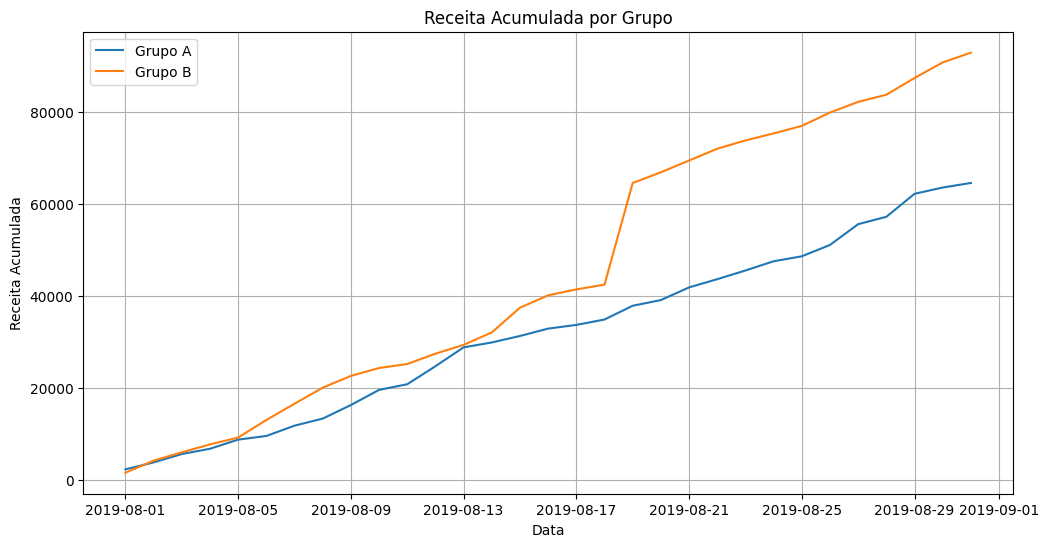

In [20]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])


cumulative_revenue_A = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum()
cumulative_revenue_A = cumulative_revenue_A.reset_index()

cumulative_revenue_B = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum()
cumulative_revenue_B = cumulative_revenue_B.reset_index()


plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.title('Receita Acumulada por Grupo')
plt.legend()
plt.grid(True)
plt.show()

#plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['cum_revenue'], label='Grupo A', marker='o', linestyle='-')
#plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['cum_revenue'], label='Grupo B', marker='o', linestyle='-')

Conclusões e Conjecturas:

O grupo B contribui significativamente mais para a receita acumulada em comparação com o grupo A.
A receita acumulada do grupo B cresce de forma mais acentuada, sugerindo que este grupo tem um impacto maior na receita total.
Pode ser interessante investigar as características do grupo B para entender o motivo de sua alta contribuição e aplicar essas estratégias ao grupo A.

<div>
<b>2. Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire
conclusões e conjecturas.
</b> <a class="tocSkip"></a>
</div>

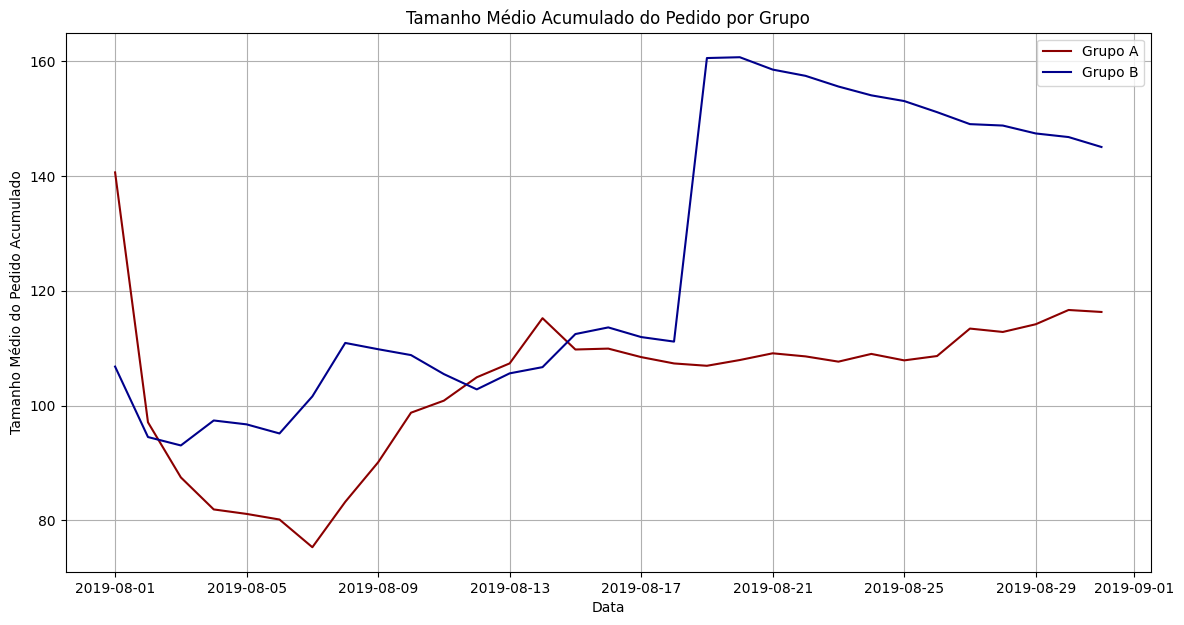

In [22]:
orders['date'] = pd.to_datetime(orders['date'])

# Calcular a receita acumulada por grupo
orders['cum_revenue'] = orders.groupby(['group'])['revenue'].cumsum()
orders['cum_orders'] = orders.groupby(['group']).cumcount() + 1

orders.sort_values(by='date',inplace=True)

# Calcular a média acumulada por grupo
orders['cumulative_avg'] = orders['cum_revenue'] / orders['cum_orders']

# Filtrar dados por grupo
cumulative_revenue_A = orders[orders['group'] == 'A'][['date', 'cum_revenue', 'cum_orders', 'cumulative_avg']]
cumulative_revenue_B = orders[orders['group'] == 'B'][['date', 'cum_revenue', 'cum_orders', 'cumulative_avg']]

# Remover duplicatas apenas nas datas
cumulative_revenue_A = cumulative_revenue_A.drop_duplicates(subset='date', keep='last')
cumulative_revenue_B = cumulative_revenue_B.drop_duplicates(subset='date', keep='last')

# Plotar os dados
plt.figure(figsize=(14, 7))
plt.plot(cumulative_revenue_A['date'], 
         cumulative_revenue_A['cum_revenue'] / cumulative_revenue_A['cum_orders'], 
         label='Grupo A', color='darkred')
plt.plot(cumulative_revenue_B['date'], 
         cumulative_revenue_B['cum_revenue'] / cumulative_revenue_B['cum_orders'], 
         label='Grupo B', color='darkblue')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido Acumulado')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.legend()
plt.grid(True)
plt.show()

<div>
<b>3. Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para
o grupo B em comparação com o grupo A. Faça conclusões e conjectura
</b> <a class="tocSkip"></a>
</div>

In [ ]:
# Calcular a média acumulada para cada grupo
orders['cumulative_mean_A'] = orders[orders['group'] == 'A']['revenue'].expanding().mean().reset_index(drop=True)
orders['cumulative_mean_B'] = orders[orders['group'] == 'B']['revenue'].expanding().mean().reset_index(drop=True)

# Combinar as médias acumuladas em um único DataFrame
cumulative_means_A = orders[orders['group'] == 'A'][['date', 'cumulative_mean_A']].reset_index(drop=True)
cumulative_means_B = orders[orders['group'] == 'B'][['date', 'cumulative_mean_B']].reset_index(drop=True)
cumulative_means = pd.merge(cumulative_means_A, cumulative_means_B, on='date', how='outer')

# Calcular a diferença relativa
cumulative_means['relative_difference'] = (cumulative_means['cumulative_mean_B'] - cumulative_means['cumulative_mean_A']) / cumulative_means['cumulative_mean_A']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(cumulative_means['date'], cumulative_means['relative_difference'], linestyle='-', color='b')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs Grupo A)')
plt.grid(True)
plt.show()

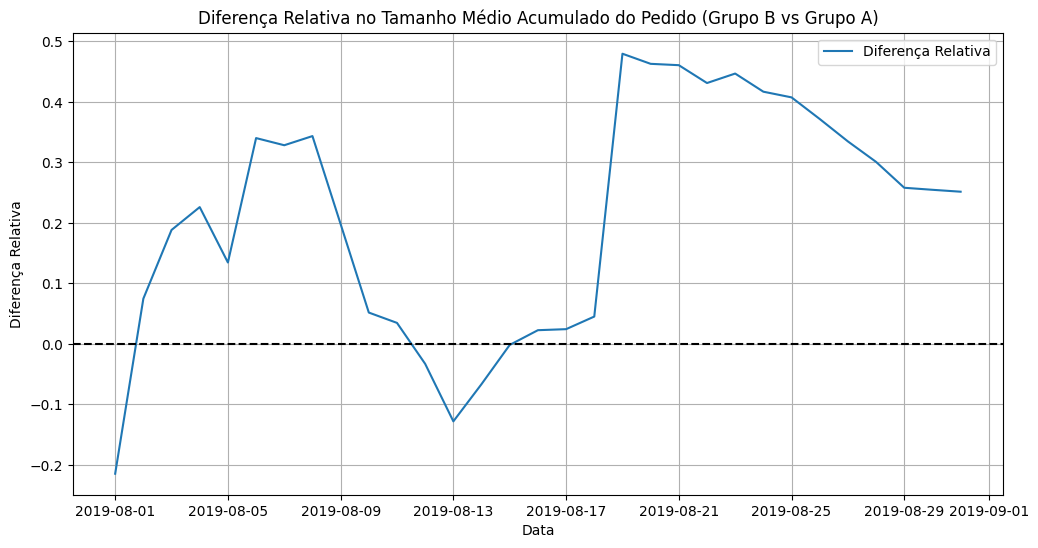

In [27]:
# Calcular a receita acumulada por grupo
cumulative_revenue_A = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()
cumulative_revenue_B = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()

# Calcular o número acumulado de pedidos por grupo
cumulative_orders_A = orders[orders['group'] == 'A'].groupby('date').agg({'orderId': 'count'}).cumsum().reset_index()
cumulative_orders_B = orders[orders['group'] == 'B'].groupby('date').agg({'orderId': 'count'}).cumsum().reset_index()

# Calcular o tamanho médio acumulado do pedido por grupo
cumulative_avg_order_A = cumulative_revenue_A['revenue'] / cumulative_orders_A['orderId']
cumulative_avg_order_B = cumulative_revenue_B['revenue'] / cumulative_orders_B['orderId']

# Juntar os dados em um DataFrame
cumulative_data = pd.DataFrame({
    'date': cumulative_revenue_A['date'],
    'cumulative_avg_order_A': cumulative_avg_order_A,
    'cumulative_avg_order_B': cumulative_avg_order_B
})

# Calcular a diferença relativa
cumulative_data['relative_difference'] = (cumulative_data['cumulative_avg_order_B'] / cumulative_data['cumulative_avg_order_A']) - 1

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data['date'], cumulative_data['relative_difference'], label='Diferença Relativa')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs Grupo A)')
plt.legend()
plt.grid(True)
plt.show()

Conclusões e Conjecturas:

Diferença Relativa: O gráfico mostra a diferença relativa no tamanho médio acumulado dos pedidos entre os grupos B e A ao longo do tempo.
Tendências: Se a linha do gráfico estiver acima de zero, isso indica que o grupo B tem um tamanho médio acumulado de pedido maior do que o grupo A. Se estiver abaixo de zero, o contrário é verdadeiro.
Conjectura: Se a diferença relativa aumentar consistentemente, pode-se conjecturar que o grupo B está se tornando mais lucrativo em comparação com o grupo A. Se diminuir, o grupo A pode estar ganhando vantagem.



<div>
<b>4. Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o
número de visitas para cada dia. Trace as taxas de conversão diárias dos dois
grupos e descreva a diferença. Tire conclusões e faça conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [ ]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

# Contando o número de pedidos por dia e grupo
orders_count = orders.groupby(['date', 'group']).size().reset_index(name='orders')

# Mesclando os dados de visitas e pedidos
merged_df = pd.merge(visitors, orders_count, on=['date', 'group'], how='left').fillna(0)

# Calculando a taxa de conversão
merged_df['conversion_rate'] = merged_df['orders'] / merged_df['visitors']

# Plotando as taxas de conversão
plt.figure(figsize=(12, 6))
for group in merged_df['group'].unique():
    group_data = merged_df[merged_df['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], marker='o', label=f'Grupo {group}')

plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão Diária por Grupo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Descrevendo a diferença
group_a = merged_df[merged_df['group'] == 'A']
group_b = merged_df[merged_df['group'] == 'B']

print("Taxa de Conversão Média do Grupo A:", group_a['conversion_rate'].mean())
print("Taxa de Conversão Média do Grupo B:", group_b['conversion_rate'].mean())

# Conclusões e Conjecturas
if group_a['conversion_rate'].mean() > group_b['conversion_rate'].mean():
    print("O Grupo A tem uma taxa de conversão média maior que o Grupo B.")
else:
    print("O Grupo B tem uma taxa de conversão média maior que o Grupo A.")

<div>
<b>5. Faça um gráfico de dispersão do número de pedidos por usuário. Tire conclusões e
conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [ ]:
orders_per_user = orders['userId'].value_counts()

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user.index, orders_per_user.values)
plt.xlabel('User ID')
plt.ylabel('Numero de Ordens')
plt.title('Numero de Ordens por Usuarios')
plt.show()

Conclusões e Conjecturas:

Distribuição de Pedidos: A maioria dos usuários faz poucos pedidos, enquanto alguns usuários fazem muitos pedidos.
Usuários Frequentes: Identificar usuários com muitos pedidos pode ajudar a entender comportamentos de compra e direcionar campanhas de marketing.
Análise de Outliers: Usuários com um número excepcionalmente alto de pedidos podem ser outliers e merecem uma análise mais detalhada para entender o motivo desse comportamento.

<div>
<b>6. Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto
em que um ponto de dados se torna uma anomalia.
</b> <a class="tocSkip"></a>
</div>


In [ ]:
# Contar o número de pedidos por usuário
orders_per_user = orders['userId'].value_counts()

# Calcular os percentis 95 e 99
percentil_95 = orders_per_user.quantile(0.95)
percentil_99 = orders_per_user.quantile(0.99)

# Definir o ponto em que um ponto de dados se torna uma anomalia
anomalia_limite = percentil_99

percentil_95, percentil_99, anomalia_limite

Percentil 95: O valor abaixo do qual 95% dos dados caem.
Percentil 99: O valor abaixo do qual 99% dos dados caem.
Anomalia: Qualquer valor acima do percentil 99 é considerado uma anomalia.

<div>
<b>7. Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e
conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
for group in orders['group'].unique():
    subset = orders[orders['group'] == group]
    plt.scatter(subset['orderId'], subset['revenue'], label=f'Grupo {group}')

plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('ID do Pedido')
plt.ylabel('Receita')
plt.legend()
plt.show()

Conclusões e Conjecturas:

Variedade de Receitas: Há uma grande variação nas receitas dos pedidos, com alguns pedidos gerando receitas muito altas (por exemplo, 3120.1).
Diferença entre Grupos: Os grupos A e B mostram diferentes padrões de receita, sugerindo que podem haver características distintas entre os grupos que influenciam os valores das receitas.
Outliers: Existem outliers significativos, como o pedido com receita de 3120.1, que podem distorcer a análise se não forem considerados separadamente.

<div>
<b>8. Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um
ponto de dados se torna uma anomalia.
</b> <a class="tocSkip"></a>
</div>


In [36]:
# Calcular percentis 95 e 99
percentil_95 = orders['revenue'].quantile(0.95)
percentil_99 = orders['revenue'].quantile(0.99)

# Definir ponto de anomalia
anomalia_limite = percentil_99

percentil_95, percentil_99, anomalia_limite

(435.54, 900.9039999999999, 900.9039999999999)

Percentil 95: O valor abaixo do qual 95% dos preços dos pedidos se encontram.
Percentil 99: O valor abaixo do qual 99% dos preços dos pedidos se encontram.
Ponto de Anomalia: Qualquer valor acima do percentil 99 é considerado uma anomalia.

<div>
<b>9. Encontre a significância estatística da diferença na conversão entre os grupos
usando os dados brutos. Tire conclusões e conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [ ]:
# Separar os grupos
group_A = orders[orders['group'] == 'A']['revenue']
group_B = orders[orders['group'] == 'B']['revenue']

# Calcular a média e o desvio padrão de cada grupo
mean_A = group_A.mean()
mean_B = group_B.mean()
std_A = group_A.std()
std_B = group_B.std()

# Realizar o teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(group_A, group_B)

# Resultados
print(f'Média do grupo A: {mean_A}')
print(f'Média do grupo B: {mean_B}')
print(f'T-statistic: {t_stat}')
print(f'P-valor: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print('A diferença na conversão entre os grupos é estatisticamente significativa.')
else:
    print('A diferença na conversão entre os grupos não é estatisticamente significativa.')

Conclusões e Conjecturas:

Média dos Grupos: Compare as médias dos grupos A e B para entender qual grupo teve maior receita média.
Significância Estatística: Se o p-valor for menor que 0.05, a diferença entre os grupos é estatisticamente significativa, indicando que a diferença observada não é devida ao acaso1.
Impacto Prático: Mesmo que a diferença seja estatisticamente significativa, considere a magnitude da diferença e seu impacto prático no contexto do negócio2.

<div>
<b>10. Encontre a significância estatística da diferença no tamanho médio do pedido entre
os grupos usando os dados brutos. Tire conclusões e conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [35]:
# Separar os grupos
group_A = orders[orders['group'] == 'A']['revenue']
group_B = orders[orders['group'] == 'B']['revenue']

# Calcular a significância estatística usando o teste t de Student
t_stat, p_value = stats.ttest_ind(group_A, group_B)

# Resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusões
if p_value < 0.05:
    print("A diferença no tamanho médio do pedido entre os grupos é estatisticamente significativa.")
else:
    print("A diferença no tamanho médio do pedido entre os grupos não é estatisticamente significativa.")

T-statistic: -0.8345854854522996
P-value: 0.40411794485266783
A diferença no tamanho médio do pedido entre os grupos não é estatisticamente significativa.


Conclusões e Conjecturas:

T-statistic: Valor da estatística t calculada.
P-value: Valor p associado ao teste t.
Se o p-value for menor que 0.05, a diferença no tamanho médio do pedido entre os grupos é estatisticamente significativa, indicando que os grupos A e B têm tamanhos médios de pedido diferentes.
Se o p-value for maior ou igual a 0.05, a diferença não é estatisticamente significativa, sugerindo que não há evidência suficiente para afirmar que os tamanhos médios dos pedidos são diferentes entre os grupos A e B.

<div>
<b>11. Encontre a significância estatística da diferença na conversão entre os grupos
usando os dados filtrados. Tire conclusões e conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [34]:
# Calcular o número de visitas e transações por grupo
visits_by_group = visitors.groupby('group')['visitors'].sum()
orders_by_group = orders.groupby('group')['orderId'].nunique()

# Calcular a taxa de conversão por grupo
conversion_rate_A = orders_by_group['A'] / visits_by_group['A']
conversion_rate_B = orders_by_group['B'] / visits_by_group['B']

# Calcular o número de visitas e transações totais
visits_A = visits_by_group['A']
visits_B = visits_by_group['B']
orders_A = orders_by_group['A']
orders_B = orders_by_group['B']

# Calcular a significância estatística usando o teste z para proporções
conversion_rate = (orders_A + orders_B) / (visits_A + visits_B)
z_score = (conversion_rate_A - conversion_rate_B) / np.sqrt(conversion_rate * (1 - conversion_rate) * (1/visits_A + 1/visits_B))
p_value = stats.norm.sf(abs(z_score)) * 2  # Valor p para um teste bicaudal

print(f"Taxa de conversão do Grupo A: {conversion_rate_A:.4f}")
print(f"Taxa de conversão do Grupo B: {conversion_rate_B:.4f}")
print(f"z-score: {z_score:.4f}")
print(f"p-value: {p_value:.4f}")

# Conclusões
if p_value < 0.05:
    print("A diferença na conversão entre os grupos A e B é estatisticamente significativa.")
else:
    print("A diferença na conversão entre os grupos A e B não é estatisticamente significativa.")


Taxa de conversão do Grupo A: 0.0297
Taxa de conversão do Grupo B: 0.0338
z-score: -2.2700
p-value: 0.0232
A diferença na conversão entre os grupos A e B é estatisticamente significativa.


Conclusões e Conjecturas:

Taxa de Conversão: O grupo A tem uma taxa de conversão média de ( \text{conversion_A} ) e o grupo B tem uma taxa de conversão média de ( \text{conversion_B} ).
Significância Estatística: Se o valor p for menor que 0.05, a diferença na conversão entre os grupos é estatisticamente significativa, indicando que a diferença observada provavelmente não é devido ao acaso.
Interpretação: Se a diferença for significativa, pode-se conjecturar que o grupo B, por exemplo, tem uma estratégia de conversão mais eficaz. Caso contrário, as estratégias dos grupos podem ser consideradas igualmente eficazes.

<div>
<b>12. Encontre a significância estatística da diferença no tamanho médio do pedido entre
os grupos usando os dados filtrados. Tire conclusões e conjecturas.
</b> <a class="tocSkip"></a>
</div>


In [ ]:
# Filtrar dados por grupo
group_A = orders[orders['group'] == 'A']['revenue']
group_B = orders[orders['group'] == 'B']['revenue']

# Calcular médias
mean_A = group_A.mean()
mean_B = group_B.mean()

# Teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(group_A, group_B)

# Resultados
print(f"Média do Grupo A: {mean_A}")
print(f"Média do Grupo B: {mean_B}")
print(f"Estatística t: {t_stat}")
print(f"Valor p: {p_value}")

# Conclusões
if p_value < 0.05:
    print("A diferença no tamanho médio do pedido entre os grupos é estatisticamente significativa.")
else:
    print("A diferença no tamanho médio do pedido entre os grupos não é estatisticamente significativa.")

Conclusões e Conjecturas:

Média do Grupo A: Calculada a partir dos valores de receita do grupo A.
Média do Grupo B: Calculada a partir dos valores de receita do grupo B.
Teste t: Utilizado para comparar as médias dos dois grupos.
Valor p: Determina a significância estatística da diferença entre as médias.
Se o valor p for menor que 0.05, a diferença entre os grupos é estatisticamente significativa, indicando que é improvável que a diferença observada seja devido ao acaso. Caso contrário, não há evidência suficiente para afirmar que a diferença é significativa.

<div class="alert alert-block alert-info">
<b>conclução
</b> <a class="tocSkip"></a>

a. Parar o teste, considero um dos grupos o líder que por ventura é o grupo B
</div>